# 1. Order of accuracy

In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Table 1

In [2]:
h=[7.8125000e-03,3.9062500e-03,1.9531250e-03,9.7656250e-04,4.8828125e-04]
err_h=[2.0844e-02,1.1118e-02,5.3455e-03,2.7049e-03,1.3469e-03] #
pol=polyfit(log(h),log(err_h),1) #polyfit
p=pol[0]
print('p =',p)

p = 0.9943085147910424


# Table 2

In [3]:
h=[7.8125000e-03,3.9062500e-03,1.9531250e-03,9.7656250e-04,4.8828125e-04]
err_h=[1.9059e-03,4.3086e-04,1.0318e-04,2.6007e-05,6.5716e-06]
pol=polyfit(log(h),log(err_h),1)
p=pol[0]
print('p =',p)

p = 2.041027135557004


# Table 3

In [4]:
h=[1.00000e+00,5.00000e-01,2.50000e-01,1.25000e-01,6.25000e-02,3.12500e-02,1.56250e-02,7.81250e-03,3.90625e-03]
err_h=[1.3829e-02,1.8805e-03,1.3742e-04,8.9170e-06,5.6252e-07,3.5239e-08,2.2037e-09,1.3775e-10,8.6098e-12]
pol=polyfit(log(h),log(err_h),1)
p=pol[0]
print('p =',p)

p = 3.8878587511744613


# 3. Compact finite difference formulas

# 3.a)

In [5]:
# first derivative
def firstderivative(a,b,m,u,ua,ub):
    '''
    Arguments
    ---------
    a,b: Boundary points
    u: function to be differentiated
    ua,ub: Boundary values of the function at a and b respectively
    m: Number of interior points
    
    Return
    ------
    U_prime: An array of dimensions m, containing values of derivatives at the interior points

    '''
    h=(b-a)/(m+1)
    A=zeros((m,m)) #tridiagonal interior matrix
    F=zeros(m)
    x1=linspace(a,b,m+2);x=x1[1:-1]
    for i in range(len(A)):
        A[i,i]=4
        if i==0:
            A[i,i+1]=1
            F[i]=(3/h)*(-u(x[i]-h)+u(x[i]+h))-ua
        if 1<=i<=m-2:
            A[i,i-1]=1
            A[i,i+1]=1
            F[i]=(3/h)*(-u(x[i]-h)+u(x[i]+h))
        if i==m-1:
            A[i,i-1]=1
            F[i]=(3/h)*(-u(x[i]-h)+u(x[i]+h))-ub
    U_prime=linalg.solve(A,F) #inverse(A)*F
    return U_prime

In [6]:
# second derivative
def secondderivative(a,b,m,u,ua,ub):
    '''
    Arguments
    ---------
    a,b: Boundary points
    u: function to be differentiated
    ua,ub: Boundary values of the function at a and b respectively
    m: Number of interior points
    
    Return
    ------
    U_prime: An array of dimensions m, containing values of derivatives at the interior points

    '''
    h=(b-a)/(m+1)
    A=zeros((m,m)) #tridiagonal interior matrix
    F=zeros(m)
    x1=linspace(a,b,m+2);x=x1[1:-1]
    for i in range(len(A)):
        A[i,i]=10
        if i==0:
            A[i,i+1]=1
            F[i]=(12/(h**2))*(u(x[i]-h)-2*u(x[i])+u(x[i]+h))-ua
        if 1<=i<=m-2:
            A[i,i-1]=1
            A[i,i+1]=1
            F[i]=(12/(h**2))*(u(x[i]-h)-2*u(x[i])+u(x[i]+h))
        if i==m-1:
            A[i,i-1]=1
            F[i]=(12/(h**2))*(u(x[i]-h)-2*u(x[i])+u(x[i]+h))-ub
    U_prime=linalg.solve(A,F) #inverse(A)*F
    return U_prime

# 3.b)

In [7]:
def u(x): #function
    return((x**2)*exp(-x))

def uprime(x): #first derivative
    return((2-x)*x*exp(-x))

def upprime(x): #second derivative
    return((2-(4*x)+(x**2))*(exp(-x)))


In [8]:
#Relative two-norm
def r2norm(V,A):
    '''
    Parameters
    ----------
    A: Is a vector containing Approximated values
    V: Contains exact values of the derivatives
    
    Return
    ------
    L2: L2 norm of the error
    '''
    error= V-A
    L2=sqrt(sum(error**2)/sum(V**2))
    return L2



In [9]:
a=0;b=1;ua=uprime(0);ub=uprime(1);ua2=upprime(0);ub2=upprime(1);m=7
#approximated values
V_first=firstderivative(a,b,m,u,ua,ub) #first derivative
print('Approximated First derivative of u(x)=',V_first)
V_second=secondderivative(a,b,m,u,ua2,ub2) #second derivative
print('\nApproximated Second derivative of u(x)=',V_second)

Approximated First derivative of u(x)= [0.20686482 0.34074188 0.41883265 0.45491032 0.46000065 0.44285157
 0.41035678]

Approximated Second derivative of u(x)= [ 1.33750572  0.82745473  0.44027676  0.15161773 -0.05855667 -0.20667064
 -0.30614235]


In [10]:
#exact values
xi=zeros(m+2)
h=(b-a)/(m+1)
xi[0]=a
xi[-1]=1
for i in range(1,m+1):
    xi[i]=a+i*h
x=xi[1:-1]
A_first=uprime(x)
print('Exact First derivative of u(x)=',A_first)
A_second=upprime(x)
print('\nExact Second derivative of u(x)=',A_second)

Exact First derivative of u(x)= [0.20683521 0.34072534 0.4188169  0.45489799 0.45999029 0.44284364
 0.41034855]

Exact Second derivative of u(x)= [ 1.33753437  0.82747583  0.44029469  0.15163266 -0.05854422 -0.20666037
 -0.30613305]


In [11]:
#relative 2-norm
L2_first=r2norm(V_first,A_first) #first derivative

L2_second=r2norm(V_second,A_second) #second derivative
L2_second

2.7613976852617972e-05

In [12]:
a=0;b=1
m=[7,15,31,63,127,255]
hi=[]
for i in m:
    h1=(b-a)/(i+1)
    hi.append(h1)
print('hi=',hi)

hi= [0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]


In [13]:
L2_1=[]
L2_2=[]
m=[7,15,31,63,127,255]
a=0;b=1;ua=uprime(0);ub=uprime(1);ua2=upprime(0);ub2=upprime(1)
for i in m:
    V_first=firstderivative(a,b,i,u,ua,ub)
    V_second=secondderivative(a,b,i,u,ua2,ub2)
    

    #exact values
    xi=zeros(i+2)
    h=(b-a)/(i+1)
    xi[0]=a
    xi[-1]=1
    for j in range(1,i+1):
        xi[j]=a+j*h
    xi = linspace(0,1,i+2)
    x=xi[1:-1]
    A_first=uprime(x)
    A_second=upprime(x)
        
    L2_first=r2norm(V_first,A_first)
    L2_1.append(L2_first)
    L2_second=r2norm(V_second,A_second)
    L2_2.append(L2_second)

<IPython.core.display.Javascript object>


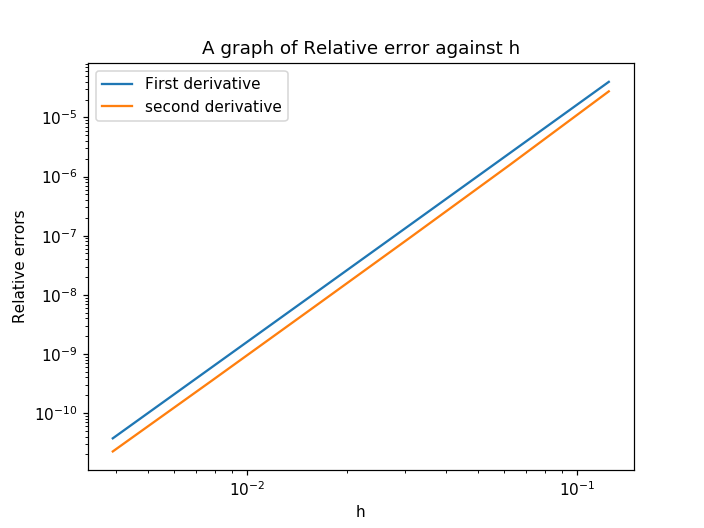

In [31]:
figure(3)
loglog(hi,L2_1,label='First derivative')
loglog(hi,L2_2,label='second derivative')
legend()
xlabel('h')
ylabel('Relative errors')
title('A graph of Relative error against h')
show()

In [15]:
#Using the graph
#first derivative
y=log(L2_1[5])-log(L2_1[0]);x=log(hi[5])-log(hi[0])
p1=y/x #slope
print('Order of accuracy for the first derivative, p1=',p1)
#second derivative
y2=log(L2_2[5])-log(L2_2[0]);x2=log(hi[5])-log(hi[0])
p2=y2/x2 #slope
print('\nOrder of accuracy for the second derivative, p2=',p2)

Order of accuracy for the first derivative, p1= 4.005846550418449

Order of accuracy for the second derivative, p2= 4.046290731712119


In [16]:
#Table first derivative
from prettytable import PrettyTable
    
x = PrettyTable()

column_names = ["m","h", "Relative two-norm"]

x.add_column(column_names[0], ["7", "15", "31","63","127","255"])
x.add_column(column_names[1], [hi[0],hi[1],hi[2],hi[3],hi[4],hi[5]])  
x.add_column(column_names[2], [L2_1[0],L2_1[1],L2_1[2],L2_1[3],L2_1[4],L2_1[5]])  
print('First derivative')
print(x)
x1 = PrettyTable()

column_names = ["m","h", "Relative two-norm"]

x1.add_column(column_names[0], ["7", "15", "31","63","127","255"])
x1.add_column(column_names[1], [hi[0],hi[1],hi[2],hi[3],hi[4],hi[5]])  
x1.add_column(column_names[2], [L2_2[0],L2_2[1],L2_2[2],L2_2[3],L2_2[4],L2_2[5]])  
print('\nSecond derivative')
print(x1)

First derivative
+-----+------------+------------------------+
|  m  |     h      |   Relative two-norm    |
+-----+------------+------------------------+
|  7  |   0.125    | 4.000196554376254e-05  |
|  15 |   0.0625   | 2.478112615395982e-06  |
|  31 |  0.03125   | 1.540049085411784e-07  |
|  63 |  0.015625  | 9.594658747465612e-09  |
| 127 | 0.0078125  | 5.986560207589377e-10  |
| 255 | 0.00390625 | 3.7383631140442744e-11 |
+-----+------------+------------------------+

Second derivative
+-----+------------+------------------------+
|  m  |     h      |   Relative two-norm    |
+-----+------------+------------------------+
|  7  |   0.125    | 2.7613976852617972e-05 |
|  15 |   0.0625   | 1.5670067254714716e-06 |
|  31 |  0.03125   | 9.372810918971164e-08  |
|  63 |  0.015625  | 5.736084941283852e-09  |
| 127 | 0.0078125  | 3.5482891351475697e-10 |
| 255 | 0.00390625 | 2.243130545540275e-11  |
+-----+------------+------------------------+


In [17]:
#Order of accuracy using the tables
p1=polyfit(log(hi),log(L2_1),1)#first direvative
print('Order of accuracy for the first derivative, p1=',p1[0])
p2=polyfit(log(hi),log(L2_2),1)#second derivative
print('\nOrder of accuracy for the second derivative, p2=',p2[0])

Order of accuracy for the first derivative, p1= 4.005612723239321

Order of accuracy for the second derivative, p2= 4.043240351769778


# 3.c)

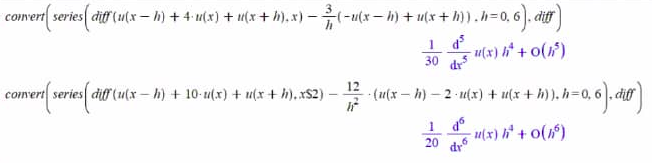

In [18]:
from PIL import Image, ImageDraw, ImageFilter

im = Image.open('/home/brian/Pictures/3c.png')
im

Numerical results for orders of accuracy in part(a) are slightly greater than those of  obtained from the theoretical results which is p=4 for both first and second derivative. This is because the numeical values include other small terms and that the value of h depends on a,b and m, which is not the case for the theoretical results. Hence the theoretical method gives an exact output of p.

# 4. Increasing the FD stencil width

# (a)

In [19]:
def weights(z, x, m):
    """
    weights(z, x, m)

    Calculates finite difference weights of up to order m.

    Implements Fornberg's algorithm.

    ARGS:
        z : Location where approximations are to be accurate
        x : Vector with x-coordinates for the grid points
        m : Highest derivative that we want to find weights for

    RETURNS:
        c : Array of size [m+1, len(x)] containing (as output) in successive rows the weights for derivatives 0, 1, ..., m.

    EXAMPLE:
        To generate the 2nd order centered FD formula for the zeroth, first and second derivative, we make the following call to weights:
        c = weights(0, [-1, 0, 1], 2)

    (c) Translated by Andrew Jones from the original source by Fornberg
    """
    import numpy as np

    n = len(x)
    c = np.zeros((m+1, n))
    c1, c4 = 1, x[0] - z
    c[0,0] = 1
    for i in range(1,n):
        mn = min(i+1, m+1)
        c2, c4, c5 = 1, x[i]-z, c4
        for j in range(0, i):
            c3 = x[i] - x[j]
            c2 *= c3
            if j==i-1:
                c[1:mn,i] = c1/c2 *(np.arange(1,mn)*c[0:mn-1,i-1] - c5*c[1:mn, i-1])
                c[0,i] = -c1*c5/c2 * c[0,i-1]
            c[1:mn,j] = (c4*c[1:mn,j] - np.arange(1,mn)*c[0:mn-1,j])/c3
            c[0,j] *= c4/c3
        c1 = c2
    return c

# Equispaced weights

In [20]:
z1=0;z2=-1+(3/14)
m=1
j=linspace(0,14,15)
x_e=zeros(len(j))

for i in range(len(j)):
    x_e[i]=-1+(2*i/14)
    
equi1=weights(z1,x_e,m)
equi2=weights(z2,x_e,m)
eq1=equi1[1]
print('Equispaced_x=0:',eq1)
eq2=equi2[1]
print('\nEquispaced_x=-1+3/14:',eq2)



Equispaced_x=0: [-2.91375291e-04  4.75912976e-03 -3.71212121e-02  1.85606061e-01
 -6.80555556e-01  2.04166667e+00 -6.12500000e+00 -2.33146835e-15
  6.12500000e+00 -2.04166667e+00  6.80555556e-01 -1.85606061e-01
  3.71212121e-02 -4.75912976e-03  2.91375291e-04]

Equispaced_x=-1+3/14: [ 9.79753445e-02 -6.28469871e+00  1.45927608e+00  1.68586620e+01
 -3.40222322e+01  5.24024378e+01 -6.35986536e+01  6.09341459e+01
 -4.58657660e+01  2.68184481e+01 -1.19390288e+01  3.91204558e+00
 -8.89916959e-01  1.25590997e-01 -8.28546655e-03]


# Chebyshev weights

In [21]:
x_c=zeros(len(j))

for i in range(len(j)):
    x_c[i]=-cos((i*pi)/14)
    
cheb1=weights(z1,x_c,m)
cheb2=weights(z2,x_c,m)
che1=cheb1[1]

print('Chebyshev_x=0:',che1)
che2=cheb2[1]
print('\nChebyshev_x=-1+3/14:',che2)

Chebyshev_x=0: [-5.00000000e-01  1.02571686e+00 -1.10991626e+00  1.27904801e+00
 -1.60387547e+00  2.30476487e+00 -4.49395921e+00 -1.55431223e-15
  4.49395921e+00 -2.30476487e+00  1.60387547e+00 -1.27904801e+00
  1.10991626e+00 -1.02571686e+00  5.00000000e-01]

Chebyshev_x=-1+3/14: [-2.34795368  5.33076998 -8.86519005  1.68422527  5.94503896 -2.77765051
  1.74253197 -1.25150422  0.9763691  -0.80770354  0.69933076 -0.62886625
  0.58455002 -0.56004955  0.27610175]


# Legendre weights

In [22]:
x_l=[-0.987992518020485,-0.937273392400706,-0.848206583410427,-0.724417731360170,-0.570972172608539,-0.394151347077563,-0.201194093997435,0,0.201194093997435,0.394151347077563,0.570972172608539,0.724417731360170,0.848206583410427,0.937273392400706,0.987992518020485]

leg1=weights(z1,x_l,m) #for x=0
leg2=weights(z2,x_l,m) #for x=-1+3/4
le1=leg1[1]
print('Legendre_x=0:',le1)
le2=leg2[1]
print('\nLegendre_x=-1+3/14:',le2)

Legendre_x=0: [-6.09296583e-02  2.19199848e-01 -4.54170017e-01  7.89875237e-01
 -1.30263141e+00  2.23522874e+00 -4.81860018e+00  4.49486410e-16
  4.81860018e+00 -2.23522874e+00  1.30263141e+00 -7.89875237e-01
  4.54170017e-01 -2.19199848e-01  6.09296583e-02]

Legendre_x=-1+3/14: [-2.16165471e-01  1.16716966e+00 -1.00257782e+01  9.37040284e+00
 -1.90534607e-01 -2.61316769e-01  3.06434286e-01 -2.80524123e-01
  2.37262469e-01 -1.90423499e-01  1.44734630e-01 -1.02343835e-01
  6.46449113e-02 -3.30011583e-02  9.43886631e-03]


# for x=0

<IPython.core.display.Javascript object>


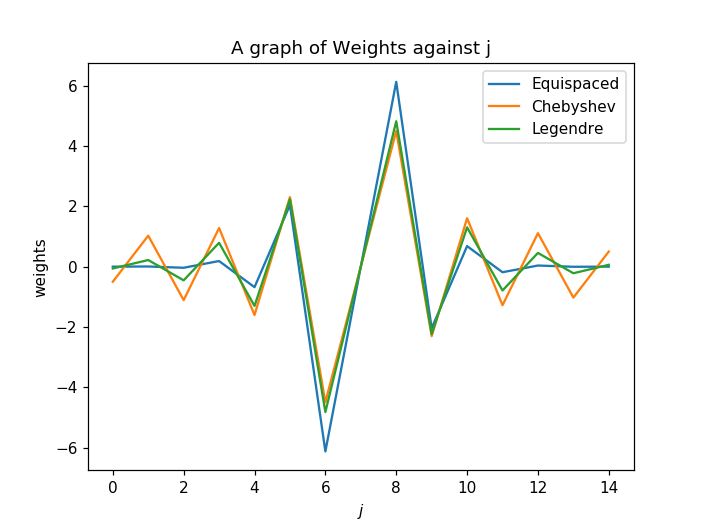

In [32]:
figure(1)
plot(j,eq1,label = 'Equispaced')
plot(j,che1,label = 'Chebyshev')
plot(j,le1,label = 'Legendre')
legend()
ylabel('weights')
xlabel('$j$')
title('A graph of Weights against j')
show()

# for x=-1+3/4

<IPython.core.display.Javascript object>


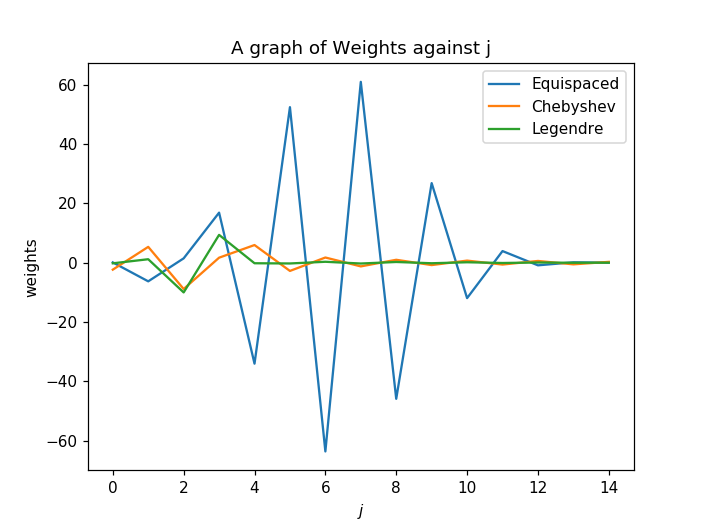

In [33]:
figure(2)
plot(j,eq2,label = 'Equispaced')
plot(j,che2,label = 'Chebyshev')
plot(j,le2,label = 'Legendre')
legend()
ylabel('weights')
xlabel('$j$')
title('A graph of Weights against j')
show()

# 4.b)

In [25]:
#function u(x)
def u(x):
    return (exp(-cos(2*(x-(1/5)))))

#first derivative (analytical) of u(x) 
def u_aly(x):
    return((2*sin(2*(x-(1/5))))*exp(-cos(2*(x-(1/5)))))

#first derivative (using wieghts ,c,) of u(x)
def u_aprox(c,u,x):
    u_prime=0 
    for i in range(15):
        u_prime=u_prime+c[i]*u(x[i])
    return u_prime

# At x=0

In [26]:
# using equispaced points
u_e1=u_aprox(eq1,u,x_e)
print('u_prime for equispaced=',u_e1)

#using Chebyshev weights
u_c1=u_aprox(che1,u,x_c)
print('\nu_prime for Chebyshev=',u_c1)

#using Legendre weights
u_l1=u_aprox(le1,u,x_l)
print('\nu_prime for Legendre =',u_l1)

u_prime for equispaced= -0.3100519485085671

u_prime for Chebyshev= -0.3100487844344211

u_prime for Legendre = -0.3100502937246638


# At x=-1+3/14

In [27]:
# using equispaced points
u_e2=u_aprox(eq2,u,x_e)
print('u_prime for equispaced=',u_e2)

#using Chebyshev weights
u_c2=u_aprox(che2,u,x_c)
print('\nu_prime for Chebyshev=',u_c2)

#using Legendre weights
u_l2=u_aprox(le2,u,x_l)
print('\nu_prime for Legendre =',u_l2)

u_prime for equispaced= -2.7200565213217183

u_prime for Chebyshev= -2.720053824318584

u_prime for Legendre = -2.720052848098075


In [28]:
#analytic first derivative of u(x)
u1=u_aly(z1)# at x=0
u2=u_aly(z2) # at x=-1+3/14

# Error

In [29]:
#at x=0
er_e1=abs(u_e1-u1) #equispaced
er_c1=abs(u_c1-u1) #chebyshev
er_l1=abs(u_l1-u1) #legendre

# at x=-1+3/14
er_e2=abs(u_e2-u2) #equispaced
er_c2=abs(u_c2-u2) #chebyshev
er_l2=abs(u_l2-u2) #legendre

#nice Table
from prettytable import PrettyTable
    
x = PrettyTable()

column_names = ["Weights", "Error at x=0", "Error at x=-1+3/14"]

x.add_column(column_names[0], ["Equispaced", "Chebyshev", "Legendre"])
x.add_column(column_names[1], [er_e1,er_c1,er_l1 ])  
x.add_column(column_names[2], [er_e2,er_c2,er_l2])  

print(x)

+------------+------------------------+------------------------+
|  Weights   |      Error at x=0      |   Error at x=-1+3/14   |
+------------+------------------------+------------------------+
| Equispaced | 1.622006684520727e-07  |  3.92388344216954e-06  |
| Chebyshev  | 3.3262748144746723e-06 | 1.226880308013989e-06  |
|  Legendre  | 1.8169845717452837e-06 | 2.5065979869509647e-07 |
+------------+------------------------+------------------------+


In all cases both at x=0 and at x=-1+3/14,the errors are different, however legendre performs better than all other weights at x=-1+3/14 compred at x=0. Eventhough, equispaced weights perform better at x=0 amongest all weights, still lengendre weights have a better error in all approximations. Therefore, i would prefer to use legendre points amongest all the weights.